### Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd

# find the csv file
path = "/content/drive/MyDrive/ISE-ITS-MELON/groceries_cust_data.csv"

# open the file
df = pd.read_csv(path, index_col=[0])

df.head()

,id,year_birth,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month
0,1640,1954.0,Graduation,"$64,587.00",6/22/14,49.0,66.0,0.0,16.0,0.0,1,3
1,4837,1965.0,PhD,"$71,322.00",2/16/13,57.0,753.0,43.0,226.0,69.0,8,4
2,3559,1988.0,2n Cycle,"$16,248.00",05-10-14,77.0,12.0,11.0,10.0,3.0,2,6
3,9239,1961.0,Master,"$61,923.00",7/26/13,94.0,92.0,4.0,18.0,3.0,2,3
4,7378,1981.0,Master,"$42,021.00",8/31/12,34.0,393.0,5.0,136.0,7.0,10,9


We observe than id could be used as the index. We will do that.

In [ ]:
df.set_index('id')
df.index.is_unique

True

"id" is unique and our actions is correct. We can continue to the next section.

### Get an overview of the non-null elements

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2240 non-null   int64  
 1   year_birth            2232 non-null   float64
 2   education             2232 non-null   object 
 3   income                2123 non-null   object 
 4   membership_since      2240 non-null   object 
 5   recency               2239 non-null   float64
 6   amt_wines             2237 non-null   float64
 7   amt_fruits            2234 non-null   float64
 8   amt_meats             2234 non-null   float64
 9   amt_fish              2235 non-null   float64
 10  num_web_purchases     2240 non-null   int64  
 11  num_web_visits_month  2240 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 292.0+ KB


### Issues with the dataset


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

membership_since could be changed to date and and income must be changed to numerical data type, in this case we will use float. We will change that.

### Changing year_birth and membership_since data type

In [ ]:
df['membership_since'] = pd.to_datetime(df['membership_since'])

df['income_temp'] = df['income'].str.replace(",", "")
df['income'] = df['income_temp'].str.replace("$", "")
df.drop('income_temp', inplace=True, axis=1)
df['income'] = df.income.astype(float)

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2240 non-null   int64         
 1   year_birth            2232 non-null   float64       
 2   education             2232 non-null   object        
 3   income                2123 non-null   float64       
 4   membership_since      2240 non-null   datetime64[ns]
 5   recency               2239 non-null   float64       
 6   amt_wines             2237 non-null   float64       
 7   amt_fruits            2234 non-null   float64       
 8   amt_meats             2234 non-null   float64       
 9   amt_fish              2235 non-null   float64       
 10  num_web_purchases     2240 non-null   int64         
 11  num_web_visits_month  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 292.0+ K

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,id,year_birth,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month
0,1640,1954.0,Graduation,64587.0,2014-06-22,49.0,66.0,0.0,16.0,0.0,1,3
1,4837,1965.0,PhD,71322.0,2013-02-16,57.0,753.0,43.0,226.0,69.0,8,4
2,3559,1988.0,2n Cycle,16248.0,2014-05-10,77.0,12.0,11.0,10.0,3.0,2,6


### Checking the total null dataset in each columns

In [ ]:
df.isnull().sum()

id                        0
year_birth                8
education                 8
income                  117
membership_since          0
recency                   1
amt_wines                 3
amt_fruits                6
amt_meats                 6
amt_fish                  5
num_web_purchases         0
num_web_visits_month      0
dtype: int64

We can see there are several null elements in 'income' column. We will check the percentage of null values in that column, and determine wether we will delete the rows with null values or not.

### Checking the percentage of missing values in the dataset

In [ ]:
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 0.5729166666666666%


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
income,117,5.223214
year_birth,8,0.357143
education,8,0.357143
amt_fruits,6,0.267857
amt_meats,6,0.267857
amt_fish,5,0.223214
amt_wines,3,0.133929
recency,1,0.044643
id,0,0.000000
membership_since,0,0.000000


In [ ]:
income_null = df['income'].isnull().sum()
count_income = len(df['income'])
income_null_percentage = (income_null/count_income)*100
print('Percentage of null values in income column = {:2.2}%'.format(income_null_percentage))

Percentage of null values in income column = 5.2%


There is only 5.2% null values in 'income' column, and less than 0.4% null values in other columns. We decide to remove every row that has null values.

### Dropping every row that has null or NaN values.

In [ ]:
for col in df.columns:
  df.drop(df[df[col].isnull()].index, inplace=True)

df.isnull().sum()

id                      0
year_birth              0
education               0
income                  0
membership_since        0
recency                 0
amt_wines               0
amt_fruits              0
amt_meats               0
amt_fish                0
num_web_purchases       0
num_web_visits_month    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2094 non-null   int64         
 1   year_birth            2094 non-null   float64       
 2   education             2094 non-null   object        
 3   income                2094 non-null   float64       
 4   membership_since      2094 non-null   datetime64[ns]
 5   recency               2094 non-null   float64       
 6   amt_wines             2094 non-null   float64       
 7   amt_fruits            2094 non-null   float64       
 8   amt_meats             2094 non-null   float64       
 9   amt_fish              2094 non-null   float64       
 10  num_web_purchases     2094 non-null   int64         
 11  num_web_visits_month  2094 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 277.2+ K

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
id,0,0.0
year_birth,0,0.0
education,0,0.0
income,0,0.0
membership_since,0,0.0
recency,0,0.0
amt_wines,0,0.0
amt_fruits,0,0.0
amt_meats,0,0.0
amt_fish,0,0.0


## Checking outliers

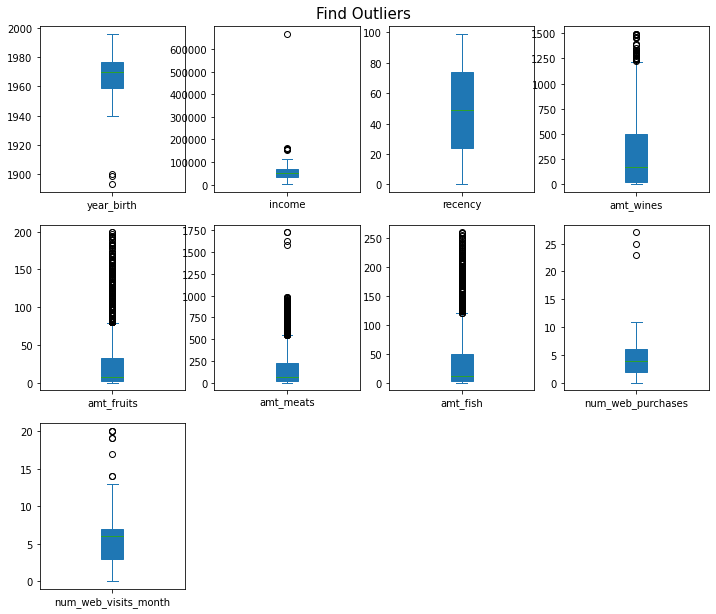

In [ ]:
# See if there is any outliers

# select columns to plot
df_to_plot = df.drop(columns=['id']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

There are some outliers in the dataset. We're removing the outliers in the 'year_birth' column since those data are not relevant to use at the present. The other outliers are natural outliers that might still be useful for further exploration.

In [ ]:
df[df['year_birth'] < 1900]

,id,year_birth,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month
235,1150,1899.0,PhD,83532.0,2013-09-26,36.0,755.0,144.0,562.0,104.0,4,1
494,11004,1893.0,2n Cycle,60182.0,2014-05-17,23.0,8.0,0.0,5.0,7.0,1,4


## Removing Outliers

In [ ]:
# Remove outliers in year_birth
df = df[df['year_birth'] >= (df['year_birth'].mean()-3*df['year_birth'].std())]
df['year_birth'].describe()

count    2091.000000
mean     1968.951698
std        11.689895
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: year_birth, dtype: float64

In [ ]:
df['income'].sort_values()

2098      1730.0
1690      2447.0
433       3502.0
87        4023.0
711       4428.0
          ...   
853     157146.0
484     157243.0
1381    157733.0
2056    160803.0
919     666666.0
Name: income, Length: 2091, dtype: float64

In [ ]:
df.drop(df[df['income'] > 600000].index, inplace = True)
df['year_birth']

0       1954.0
1       1965.0
2       1988.0
3       1961.0
4       1981.0
         ...  
2235    1974.0
2236    1949.0
2237    1977.0
2238    1981.0
2239    1969.0
Name: year_birth, Length: 2090, dtype: float64

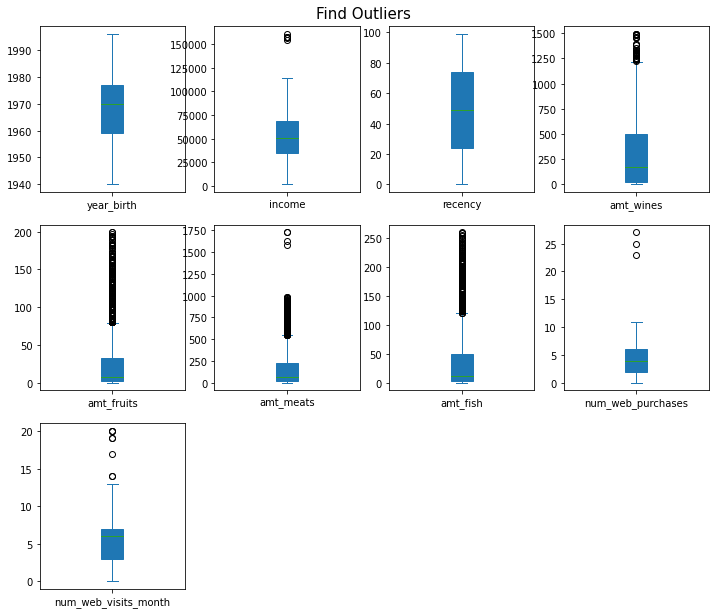

In [ ]:
# select columns to plot
df_to_plot = df.drop(columns=['id']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

After that, we're checking for duplicated rows.

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,id,year_birth,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month


No duplicated rows, which means we can go through to the next stage.

Checking writing inconsistencies in the categorical value ('education')

In [1]:
df['education'].unique()

NameError: name 'df' is not defined

There is no writing inconsistencies found.

After we dropped all the null in all the rows, we can change all float data types to integer.

In [ ]:
df = df.astype({"year_birth":'int', "income":'int', "recency":'int', "amt_wines":'int', "amt_fruits":'int',"amt_meats":'int', "amt_fish":'int'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2090 non-null   int64         
 1   year_birth            2090 non-null   int64         
 2   education             2090 non-null   object        
 3   income                2090 non-null   int64         
 4   membership_since      2090 non-null   datetime64[ns]
 5   recency               2090 non-null   int64         
 6   amt_wines             2090 non-null   int64         
 7   amt_fruits            2090 non-null   int64         
 8   amt_meats             2090 non-null   int64         
 9   amt_fish              2090 non-null   int64         
 10  num_web_purchases     2090 non-null   int64         
 11  num_web_visits_month  2090 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 212.3+ KB


create new column 'age' by converting year_birth to age

In [ ]:
df.head(2)

,id,year_birth,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month
0,1640,1954,Graduation,64587,2014-06-22,49,66,0,16,0,1,3
1,4837,1965,PhD,71322,2013-02-16,57,753,43,226,69,8,4


<h1>Generating new variables</h1>

* Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
* Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
* Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"

* Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
* Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns

* "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [ ]:
# Create new features
df["age"] = 2022 - df["year_birth"]
df.drop("year_birth", axis=1, inplace=True)
# df["join_year"] = pd.DatetimeIndex(df["membership_since"]).year.astype(int)
# df["join_month"] = pd.DatetimeIndex(df["membership_since"]).month.astype(int) % 12 
# df["join_day"] = df["membership_since"] - df["membership_since"].astype('datetime64[M]') + 1
df["total_amt"] = df['amt_wines']+ df['amt_fruits']+ df['amt_meats']+ df['amt_fish'] # bisa buat liat cust behavior
df["AOV"] = df["total_amt"]/df["num_web_purchases"] # Average order value

df.head()

,id,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV
0,1640,Graduation,64587,2014-06-22,49,66,0,16,0,1,3,68,82,82.000
1,4837,PhD,71322,2013-02-16,57,753,43,226,69,8,4,57,1091,136.375
2,3559,2n Cycle,16248,2014-05-10,77,12,11,10,3,2,6,34,36,18.000
3,9239,Master,61923,2013-07-26,94,92,4,18,3,2,3,61,117,58.500
4,7378,Master,42021,2012-08-31,34,393,5,136,7,10,9,41,541,54.100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2090 non-null   int64         
 1   education             2090 non-null   object        
 2   income                2090 non-null   int64         
 3   membership_since      2090 non-null   datetime64[ns]
 4   recency               2090 non-null   int64         
 5   amt_wines             2090 non-null   int64         
 6   amt_fruits            2090 non-null   int64         
 7   amt_meats             2090 non-null   int64         
 8   amt_fish              2090 non-null   int64         
 9   num_web_purchases     2090 non-null   int64         
 10  num_web_visits_month  2090 non-null   int64         
 11  age                   2090 non-null   int64         
 12  total_amt             2090 non-null   int64         
 13  AOV               

In [ ]:
df.describe()

,id,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,5596.558852,51799.387560,48.816268,303.939713,26.499043,166.420574,37.652153,4.097129,5.340191,53.052153,534.511483,inf
std,3239.262394,21409.547801,28.852719,335.379471,40.041030,223.499590,54.590683,2.758969,2.436275,11.691366,550.715289,NaN
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,3.000000,0.444444
25%,2839.250000,35032.500000,24.000000,24.000000,2.000000,16.000000,3.000000,2.000000,3.000000,45.000000,50.000000,32.000000
50%,5458.500000,51171.500000,49.000000,174.500000,8.000000,68.000000,12.000000,4.000000,6.000000,52.000000,328.000000,67.062500
75%,8411.750000,68279.250000,74.000000,502.000000,33.000000,230.750000,50.000000,6.000000,7.000000,63.000000,918.750000,165.977273
max,11191.000000,160803.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,27.000000,20.000000,82.000000,2285.000000,inf




### Plotting 

First, we're going to divide the data into two, which are numerical and categorical values.

In [ ]:
num_cols = df._get_numeric_data().columns
df_numeric = df[num_cols]
df_numeric.head()

,id,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV
0,1640,64587,49,66,0,16,0,1,3,68,82,82.000
1,4837,71322,57,753,43,226,69,8,4,57,1091,136.375
2,3559,16248,77,12,11,10,3,2,6,34,36,18.000
3,9239,61923,94,92,4,18,3,2,3,61,117,58.500
4,7378,42021,34,393,5,136,7,10,9,41,541,54.100


In [ ]:
df_categorical = df.drop(num_cols, axis = 1)
df_categorical.head()

,education,membership_since
0,Graduation,2014-06-22
1,PhD,2013-02-16
2,2n Cycle,2014-05-10
3,Master,2013-07-26
4,Master,2012-08-31


In [ ]:
df_categorical['membership_since'].unique()

array(['2014-06-22T00:00:00.000000000', '2013-02-16T00:00:00.000000000',
       '2014-05-10T00:00:00.000000000', '2013-07-26T00:00:00.000000000',
       '2012-08-31T00:00:00.000000000', '2013-07-16T00:00:00.000000000',
       '2012-11-10T00:00:00.000000000', '2013-11-04T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2014-03-03T00:00:00.000000000',
       '2013-11-29T00:00:00.000000000', '2012-12-23T00:00:00.000000000',
       '2013-09-11T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-10-15T00:00:00.000000000',
       '2014-06-14T00:00:00.000000000', '2014-03-01T00:00:00.000000000',
       '2013-08-10T00:00:00.000000000', '2012-09-29T00:00:00.000000000',
       '2013-06-24T00:00:00.000000000', '2012-10-10T00:00:00.000000000',
       '2013-04-03T00:00:00.000000000', '2013-07-09T00:00:00.000000000',
       '2013-10-21T00:00:00.000000000', '2014-04-05T00:00:00.000000000',
       '2012-10-20T00:00:00.000000000', '2013-01-12

Next, we are importing the needed visualization tools.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Categorical plotting

The plot below is for the column education. We can see that almost half of the buyers list is graduation, which we assume is an undergraduate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


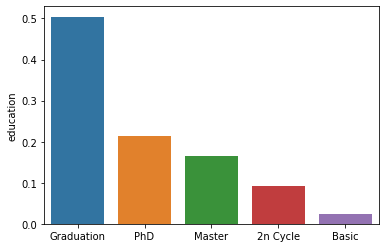

In [ ]:
sns.barplot(df_categorical['education'].value_counts().index,
                 y=df_categorical['education'].value_counts(normalize = True))

In [ ]:
df_categorical['education'].value_counts()

Graduation    1054
PhD            449
Master         347
2n Cycle       190
Basic           50
Name: education, dtype: int64

Next, we're going to make a plot of "membership_since" based on the year. We see that membership is made up mostly of members since 2013.

In [ ]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   education         2090 non-null   object        
 1   membership_since  2090 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 49.0+ KB


In [ ]:
df_categorical['membership_since']

0      2014-06-22
1      2013-02-16
2      2014-05-10
3      2013-07-26
4      2012-08-31
          ...    
2235   2013-04-13
2236   2014-04-29
2237   2013-04-30
2238   2012-08-04
2239   2013-02-28
Name: membership_since, Length: 2090, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


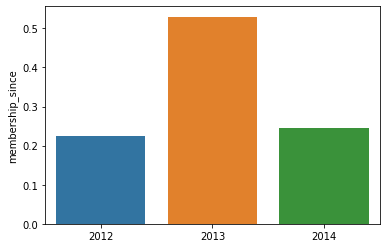

In [ ]:
df_categorical['membership_since'] = df_categorical['membership_since'].dt.year

sns.barplot(df_categorical['membership_since'].value_counts().index,
                 y=df_categorical['membership_since'].value_counts(normalize = True))

In [ ]:
df_categorical['membership_since'].value_counts()

2013    1107
2014     514
2012     469
Name: membership_since, dtype: int64

##Numerical plotting

In [ ]:
df_numeric.head()

,id,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV
0,1640,64587,49,66,0,16,0,1,3,68,82,82.000
1,4837,71322,57,753,43,226,69,8,4,57,1091,136.375
2,3559,16248,77,12,11,10,3,2,6,34,36,18.000
3,9239,61923,94,92,4,18,3,2,3,61,117,58.500
4,7378,42021,34,393,5,136,7,10,9,41,541,54.100


First, we're going to make the plot of "age". We can see that the plot is almost bell-shaped.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 52.0
Mean: 53.05215311004785
Std Dev: 11.691366039980378


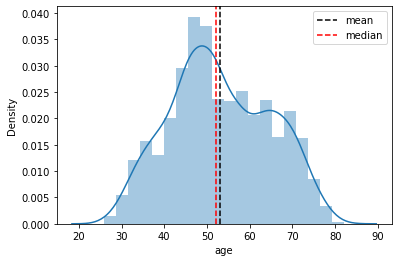

In [ ]:
x = df_numeric["age"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()


Next, income is the next column to be plotted.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 51171.5
Mean: 51799.387559808616
Std Dev: 21409.54780053733


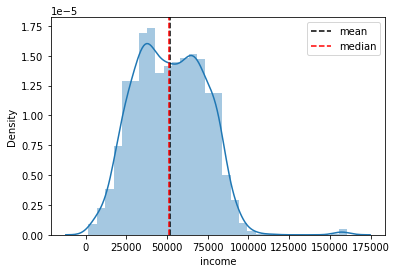

In [ ]:
x = df_numeric["income"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

We can see that the outlier is affecting the plot. We are going to only take the income values below 150000.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 51117.5
Mean: 51495.65595009597
Std Dev: 20676.734092542498


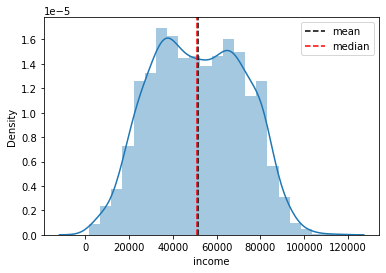

In [ ]:
x = df_numeric["income"][df_numeric["income"] < 150000]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Next, we plot recency.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 49.0
Mean: 48.816267942583735
Std Dev: 28.852718945791587


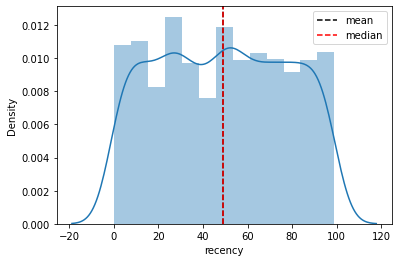

In [ ]:
x = df_numeric["recency"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

# insight: recency lebih merata liat dari median dan mean nya

Next, we plot num_web_purchases.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 4.0
Mean: 4.097129186602871
Std Dev: 2.758969251954619


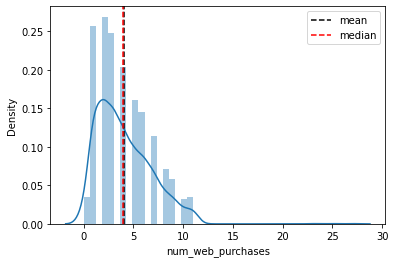

In [ ]:
x = df_numeric["num_web_purchases"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 4.0
Mean: 4.067081935793004
Std Dev: 2.6438126295244655


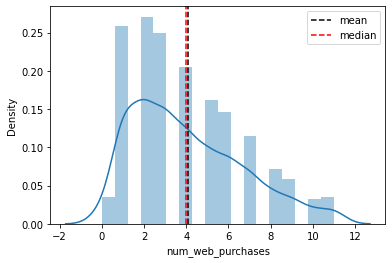

In [ ]:
x = df_numeric["num_web_purchases"][df_numeric['num_web_purchases'] < 15]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

Lastly, we plot num_web_visits_month.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 6.0
Mean: 5.340191387559809
Std Dev: 2.436274840772728


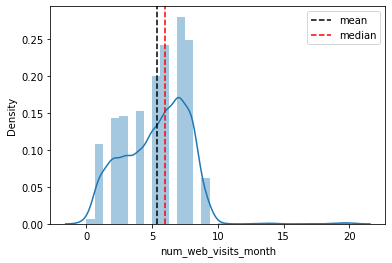

In [ ]:
x = df_numeric["num_web_visits_month"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Median: 3.0
Mean: 3.9177679882525696
Std Dev: 2.4662446939256792


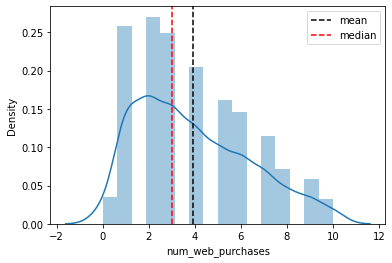

In [ ]:
x = df_numeric["num_web_purchases"][df_numeric['num_web_purchases'] < 11]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

##2D Plotting

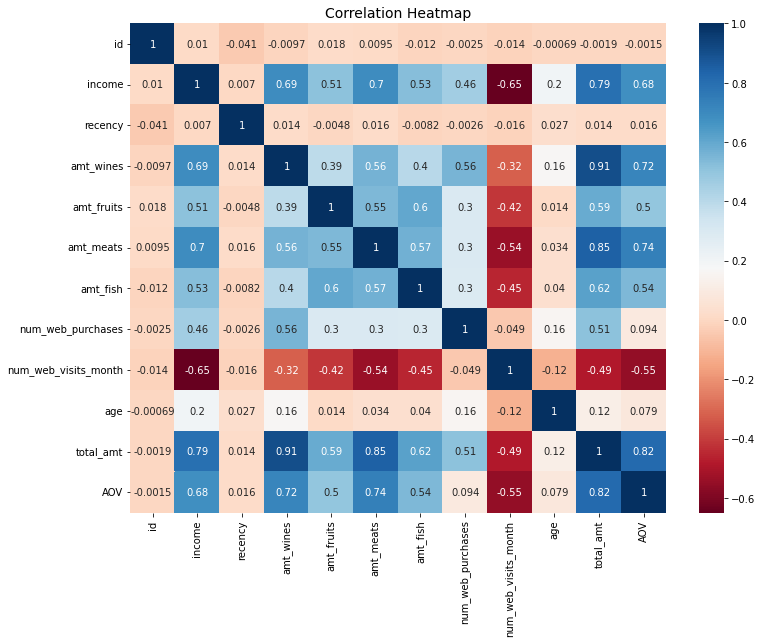

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

# korelasi != kausasi
# belum tentu sebab akibat
# jea

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2090 non-null   int64         
 1   education             2090 non-null   object        
 2   income                2090 non-null   int64         
 3   membership_since      2090 non-null   datetime64[ns]
 4   recency               2090 non-null   int64         
 5   amt_wines             2090 non-null   int64         
 6   amt_fruits            2090 non-null   int64         
 7   amt_meats             2090 non-null   int64         
 8   amt_fish              2090 non-null   int64         
 9   num_web_purchases     2090 non-null   int64         
 10  num_web_visits_month  2090 non-null   int64         
 11  age                   2090 non-null   int64         
 12  total_amt             2090 non-null   int64         
 13  AOV               

<h1>Label Encoding for Categorical Variable</h1>


Because education is a categorical variable, we will encode it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding the object dtypes.
LE=LabelEncoder()
df_preprocess = df.copy() 
df_preprocess['education']=df_preprocess[['education']].apply(LE.fit_transform)
df_preprocess.head()
# print("All features are now numerical")

,id,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV
0,1640,2,64587,2014-06-22,49,66,0,16,0,1,3,68,82,82.000
1,4837,4,71322,2013-02-16,57,753,43,226,69,8,4,57,1091,136.375
2,3559,0,16248,2014-05-10,77,12,11,10,3,2,6,34,36,18.000
3,9239,3,61923,2013-07-26,94,92,4,18,3,2,3,61,117,58.500
4,7378,3,42021,2012-08-31,34,393,5,136,7,10,9,41,541,54.100


<h1>Scaling the Dataset </h1>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_std = df_preprocess.copy()
df_std = df_std.drop(['membership_since', 'AOV'], axis=1)

In [ ]:
df_std.head()

,id,education,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt
0,1640,2,64587,49,66,0,16,0,1,3,68,82
1,4837,4,71322,57,753,43,226,69,8,4,57,1091
2,3559,0,16248,77,12,11,10,3,2,6,34,36
3,9239,3,61923,94,92,4,18,3,2,3,61,117
4,7378,3,42021,34,393,5,136,7,10,9,41,541


In [ ]:
# Apply Standard Scaler to entire dataset
# scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_std), columns=df_std.columns)
df_std.head()

,id,education,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt
0,0.146546,0.50,0.395146,0.494949,0.044206,0.000000,0.009275,0.000000,0.037037,0.15,0.750000,0.034619
1,0.432222,1.00,0.437485,0.575758,0.504354,0.216080,0.131014,0.266409,0.296296,0.20,0.553571,0.476775
2,0.318023,0.00,0.091266,0.777778,0.008038,0.055276,0.005797,0.011583,0.074074,0.30,0.142857,0.014461
3,0.825574,0.75,0.378399,0.949495,0.061621,0.020101,0.010435,0.011583,0.074074,0.15,0.625000,0.049956
4,0.659280,0.75,0.253286,0.343434,0.263228,0.025126,0.078841,0.027027,0.370370,0.45,0.267857,0.235758


<h1> Feature Selection </h1>

In [ ]:
 ### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df_std[['income', 'total_amt']].values

X

array([[0.39514562, 0.03461876],
       [0.43748468, 0.47677476],
       [0.09126627, 0.014461  ],
       ...,
       [0.12101991, 0.01183173],
       [0.3470545 , 0.38869413],
       [0.49802292, 0.73751096]])

In [ ]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2090 non-null   float64
 1   education             2090 non-null   float64
 2   income                2090 non-null   float64
 3   recency               2090 non-null   float64
 4   amt_wines             2090 non-null   float64
 5   amt_fruits            2090 non-null   float64
 6   amt_meats             2090 non-null   float64
 7   amt_fish              2090 non-null   float64
 8   num_web_purchases     2090 non-null   float64
 9   num_web_visits_month  2090 non-null   float64
 10  age                   2090 non-null   float64
 11  total_amt             2090 non-null   float64
 12  Cluster               2090 non-null   float64
dtypes: float64(13)
memory usage: 212.4 KB


<h1> Clustering </h1>

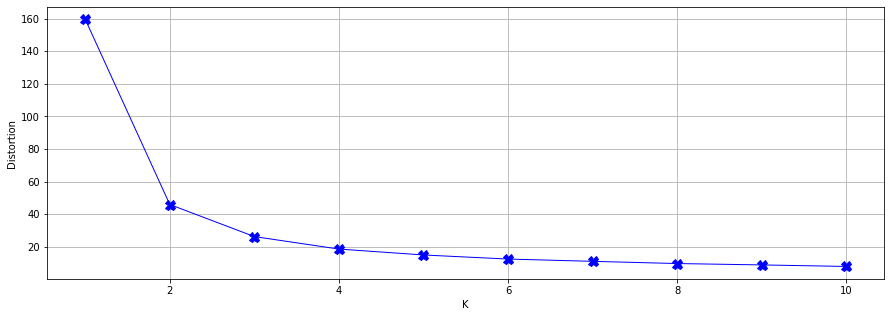

In [ ]:
import sklearn.cluster as cluster

distortions = []
K = range(1,11)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bX-',linewidth=1, markersize=10)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

We choose 4 as the number of cluster (k).

<h3> KMeans Clustering Algorithm </h3>

In [ ]:
# Assign 4 to the variable K representing number of Clusters
K=4
# Fit KMeans algorithm to dataset using the chosen number of Clusters
kmeans = cluster.KMeans(n_clusters=K, init="k-means++",random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([3, 0, 1, ..., 1, 0, 2], dtype=int32)

In [ ]:
kmeans.labels_

array([3, 0, 1, ..., 1, 0, 2], dtype=int32)

In [ ]:
# Assign kmeans labels to the dataset and the copied dataset for further analysis
df_std['Cluster'] = kmeans.labels_
df_preprocess['Cluster'] = kmeans.labels_
df_preprocess.head(9)

,id,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV,Cluster
0,1640,2,64587,2014-06-22,49,66,0,16,0,1,3,68,82,82.000000,3
1,4837,4,71322,2013-02-16,57,753,43,226,69,8,4,57,1091,136.375000,0
2,3559,0,16248,2014-05-10,77,12,11,10,3,2,6,34,36,18.000000,1
3,9239,3,61923,2013-07-26,94,92,4,18,3,2,3,61,117,58.500000,3
4,7378,3,42021,2012-08-31,34,393,5,136,7,10,9,41,541,54.100000,3
5,8534,2,67433,2013-07-16,51,615,28,259,12,6,4,70,914,152.333333,0
6,624,3,18890,2012-11-10,5,6,4,1,7,0,6,38,18,inf,1
7,1321,2,26067,2013-11-04,49,22,2,18,0,3,8,48,42,14.000000,1
8,8210,3,54730,2013-08-15,64,318,3,17,4,4,4,47,342,85.500000,3


In [ ]:
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
  print(i)

0
1
2
3


In [ ]:
df_std.head()

,id,education,income,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,Cluster
0,0.146546,0.50,0.395146,0.494949,0.044206,0.000000,0.009275,0.000000,0.037037,0.15,0.750000,0.034619,3
1,0.432222,1.00,0.437485,0.575758,0.504354,0.216080,0.131014,0.266409,0.296296,0.20,0.553571,0.476775,0
2,0.318023,0.00,0.091266,0.777778,0.008038,0.055276,0.005797,0.011583,0.074074,0.30,0.142857,0.014461,1
3,0.825574,0.75,0.378399,0.949495,0.061621,0.020101,0.010435,0.011583,0.074074,0.15,0.625000,0.049956,3
4,0.659280,0.75,0.253286,0.343434,0.263228,0.025126,0.078841,0.027027,0.370370,0.45,0.267857,0.235758,3


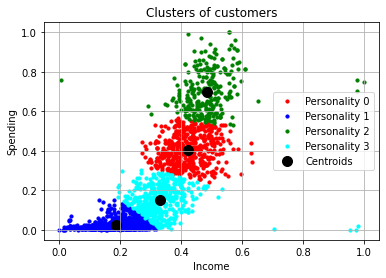

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Personality 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Personality 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Personality 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Personality 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()



<h3> Data distribution </h3>

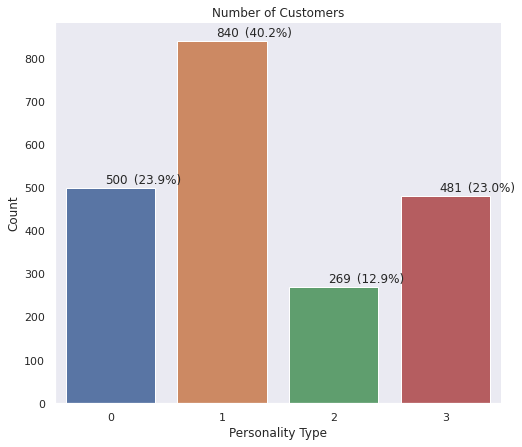

In [ ]:
sns.set_theme(style="darkgrid")
plt.rcParams.update({'axes.grid': False})
plt.figure(figsize =(8, 7))
count_plot = sns.countplot(x = 'Cluster', 
                           data = df_preprocess)
count_plot.set(xlabel ="Personality Type", 
               ylabel = "Count", 
               title ='Number of Customers')
total = len(df_preprocess)
for p in count_plot.patches:
   count_plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
   percentage = ' ({:.1f}%)'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()
   y = p.get_height() + 10
   count_plot.annotate(percentage, (x, y),ha = 'center')
sns.despine(bottom = False, left = False)

<h3>Age Distribution </h3>

<Figure size 720x720 with 0 Axes>

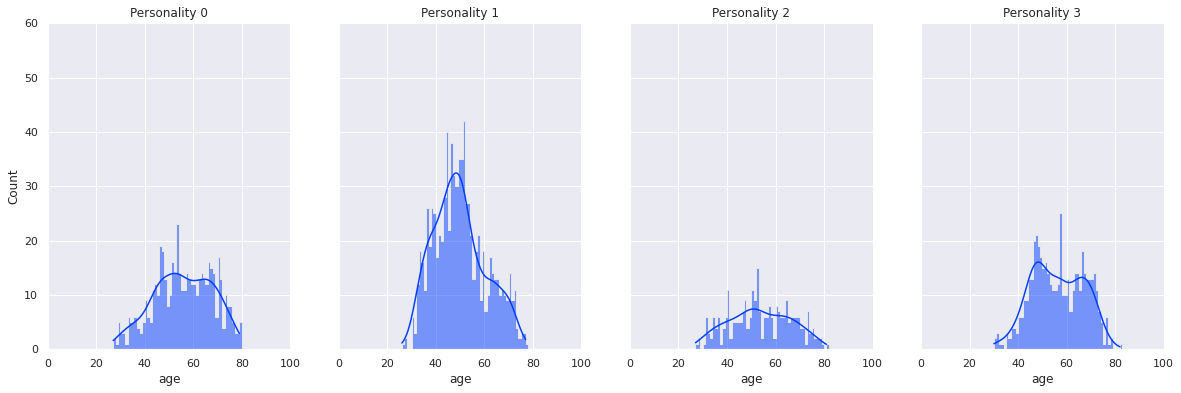

In [ ]:
# Plot Age distribution for each Personality type
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(ncols=K, figsize=(5 * K,6), sharex = True, sharey = True)

for i in range(K):
  ax[i].set_title("Personality "+str(i))
  ax[i].set_xlim(0,100)
  ax[i].set_ylim(0,60)
  sns.histplot(
      df_preprocess[df_preprocess["Cluster"]==i],
      x="age",
      hue="Cluster",
      multiple="stack",
      palette="bright",
      edgecolor=".9",
      bins= list(range(1,100)),
      ax=ax[i],
      legend=False,
      kde=True,
      element = "step"
  )
plt.grid(True)
sns.despine()

* Personality 0: middle aged sampai old adults
* personality 1: middle aged sampai old adults
* personality 2: middle aged sampai old adults
* personality 3: middle aged sampai old adults

<h3> Income vs spending </h3>

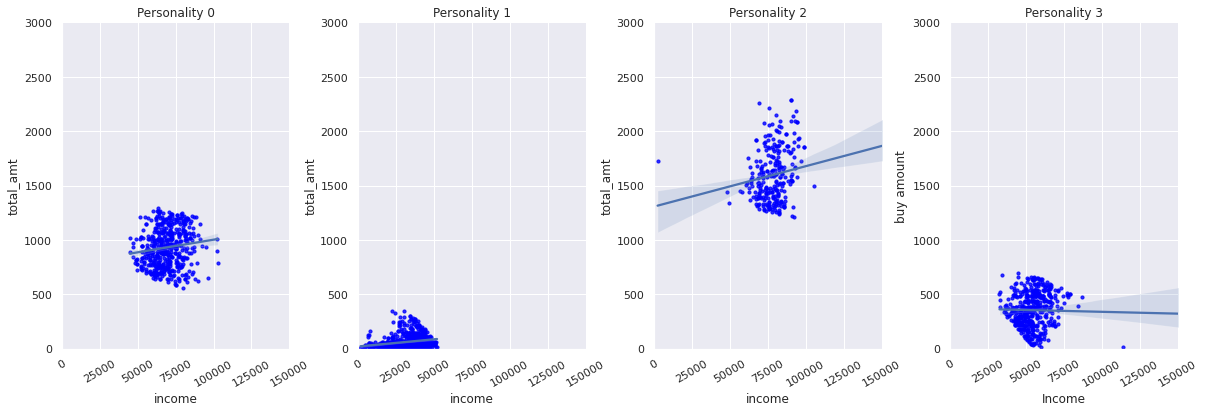

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,150000)
  axs[i].set_ylim(0,3000)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'income',
              y = 'total_amt', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

* personality 0: high income, mid spending
* personality 1: low income, low spending
* personality 2: high income, high spending
* personality 3: mid income, low spending

In [ ]:
df_preprocess.head()

,id,education,income,membership_since,recency,amt_wines,amt_fruits,amt_meats,amt_fish,num_web_purchases,num_web_visits_month,age,total_amt,AOV,Cluster
0,1640,2,64587,2014-06-22,49,66,0,16,0,1,3,68,82,82.000,3
1,4837,4,71322,2013-02-16,57,753,43,226,69,8,4,57,1091,136.375,0
2,3559,0,16248,2014-05-10,77,12,11,10,3,2,6,34,36,18.000,1
3,9239,3,61923,2013-07-26,94,92,4,18,3,2,3,61,117,58.500,3
4,7378,3,42021,2012-08-31,34,393,5,136,7,10,9,41,541,54.100,3


<h3> amout spent on each product within each cluster </h3>

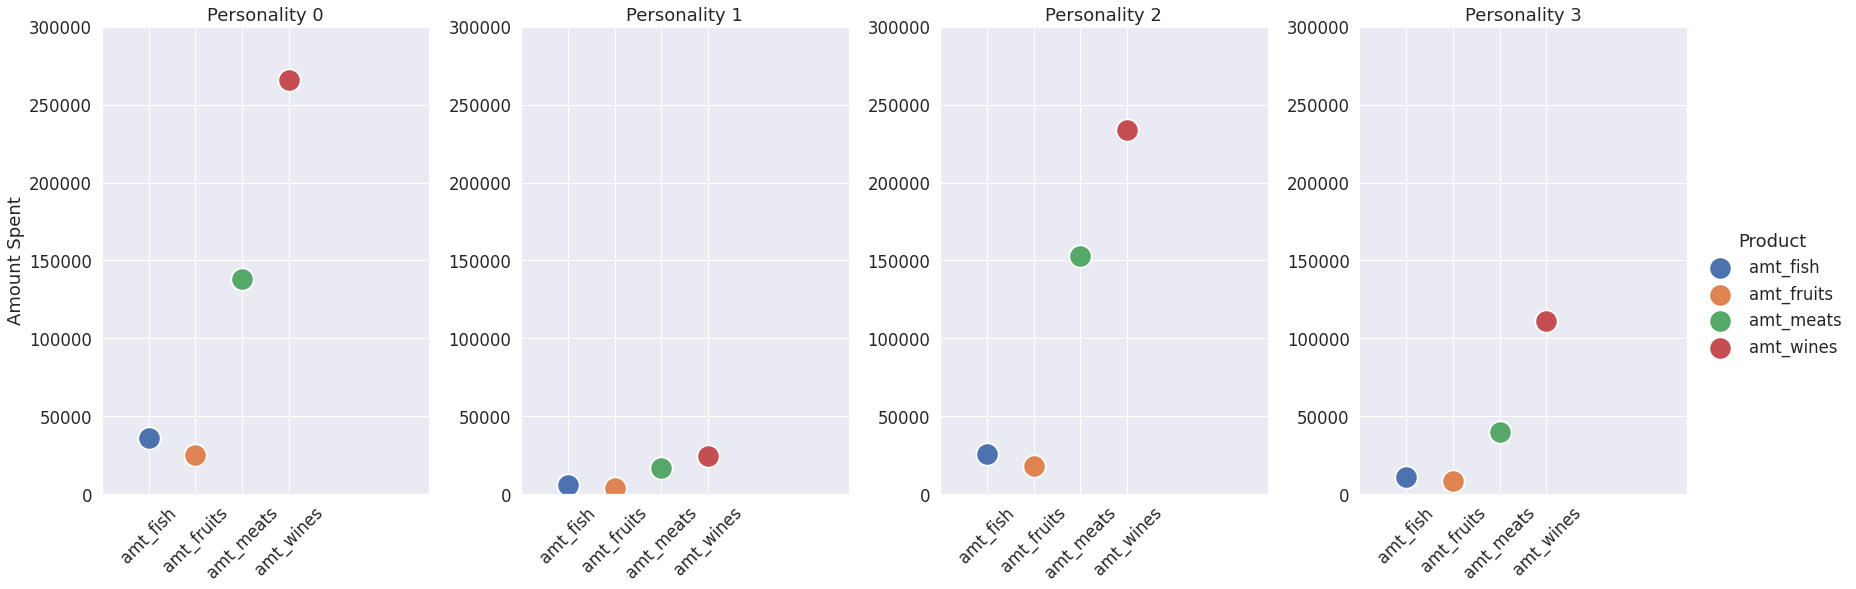

In [ ]:
df_long = df_preprocess[['Cluster','amt_wines','amt_fruits','amt_meats','amt_fish']]
# df_long

df_long_melt = pd.melt(df_long, id_vars=['Cluster'], var_name = 'Product', value_name='AmountSpent')


new = pd.DataFrame(df_long_melt.groupby(['Cluster','Product'], as_index=False)['AmountSpent'].agg('sum')) #

new['Product'] = new['Product'].str.replace('Mnt','')
new['Product'] = new['Product'].str.replace('Products','')
new['Product'] = new['Product'].str.replace('Prods','')

sns.set(font_scale=1.5)

g = sns.FacetGrid(data = new, col='Cluster', hue = 'Product', sharey = False, sharex=False,ylim=(0,300000), xlim=(-1,6),
                  aspect=.75, height=8)

g.map_dataframe(sns.scatterplot, y = 'AmountSpent', x ='Product' ,size='AmountSpent',sizes=(500,85000))
g.set_axis_labels('','Amount Spent')
g.set_titles(col_template='Personality {col_name}')
g.set_xticklabels(rotation=45) 
g.add_legend()
g.despine()

<h3> age vs web visits </h3>

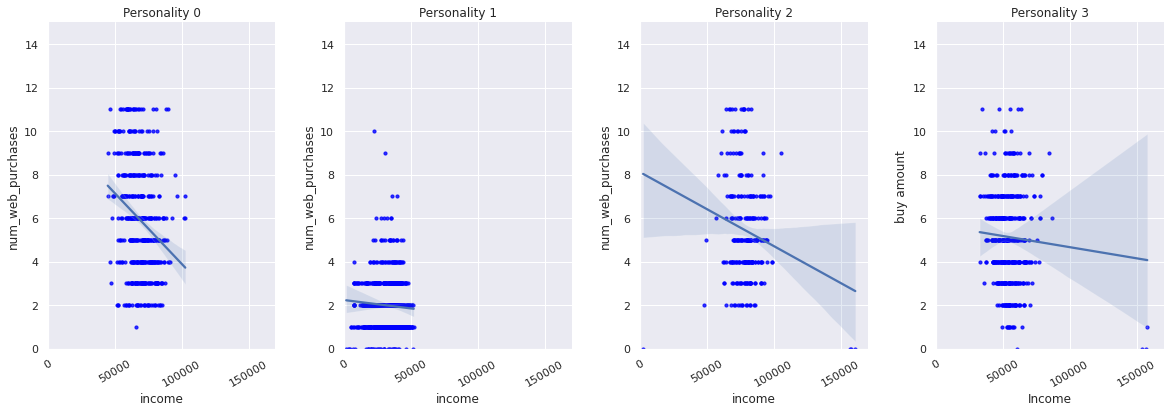

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,170000)
  axs[i].set_ylim(0,15)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'income',
              y = 'num_web_purchases', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

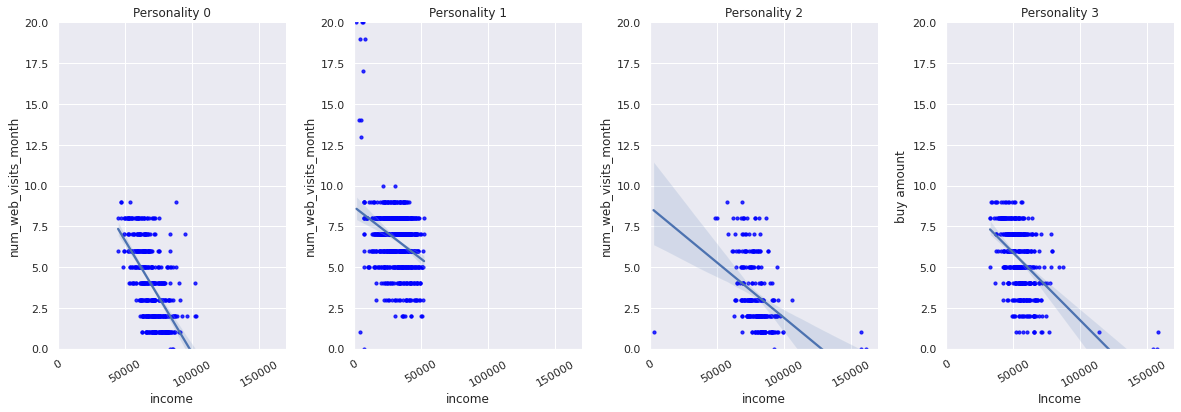

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,170000)
  axs[i].set_ylim(0,20)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'income',
              y = 'num_web_visits_month', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

Based on the two plots above, we see that people with higher income tends to buy things via web more than people with lower income. And, people with higher income tends to visit the website less than people with lower income.

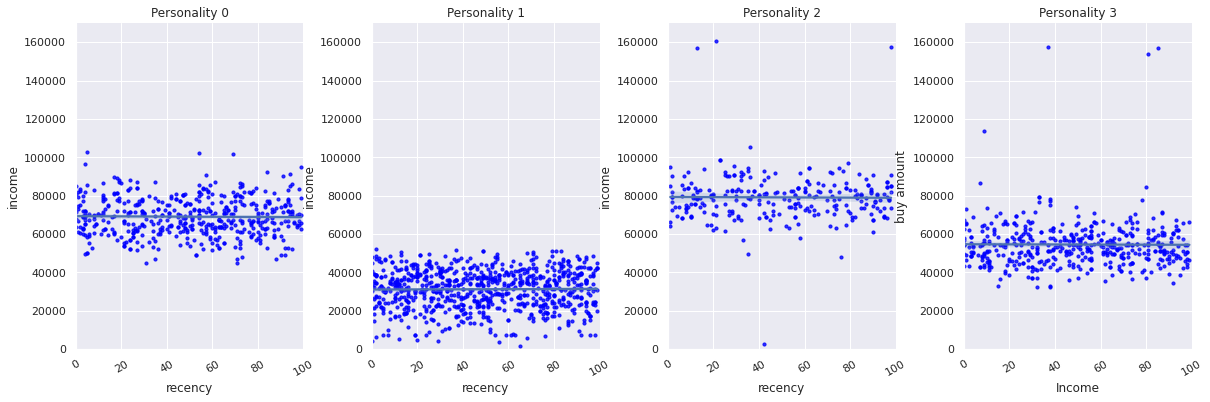

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,100)
  axs[i].set_ylim(0,170000)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'recency',
              y = 'income', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

We conclude that all level of income tend to have the same recency.

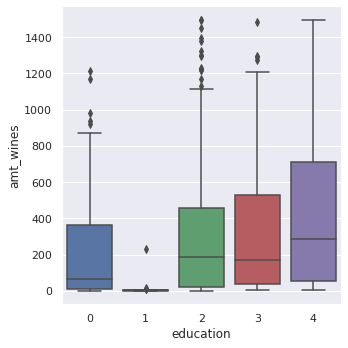

In [ ]:
sns.catplot(data=df_preprocess, x="education", y="amt_wines", kind="box")

People with higher education tend to buy more wine.

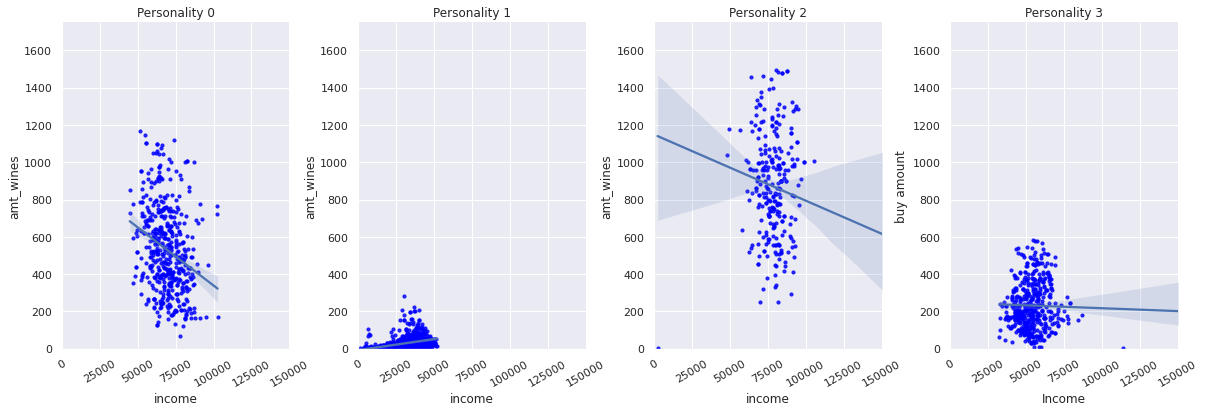

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,150000)
  axs[i].set_ylim(0,1750)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'income',
              y = 'amt_wines', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

High income customers tend to buy more wine than lower income customers

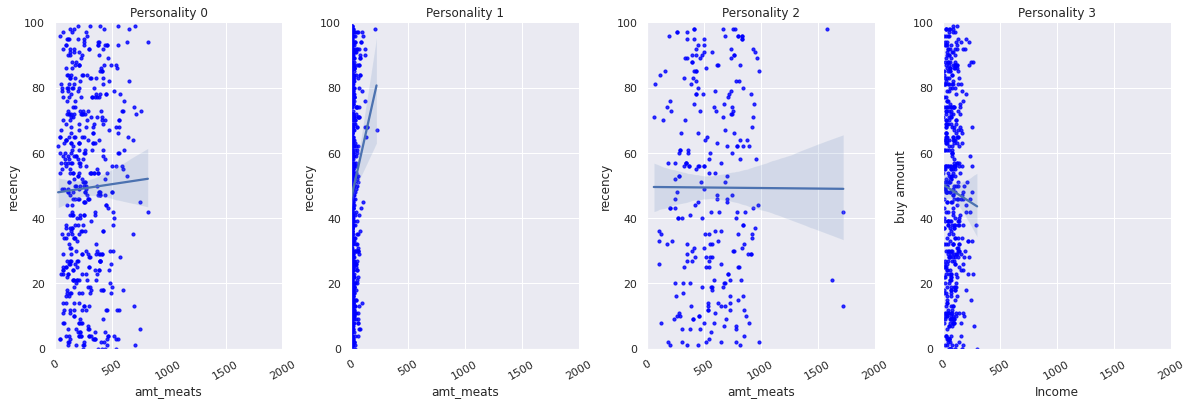

In [ ]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, K, figsize=(5 * K,6), sharex=False, sharey=False)

for i in range(K):
  axs[i].set_xlim(0,2000)
  axs[i].set_ylim(0,100)
  axs[i].tick_params(axis='x', rotation=30)
  g = sns.regplot(data = df_preprocess[df_preprocess['Cluster']==i],
              x = 'amt_meats',
              y = 'recency', 
              scatter_kws = {'s':10, 'color':'blue'},
              ax = axs[i])
  g.set_title("Personality " + str(i))

g.set(xlabel="Income")
g.set(ylabel="buy amount")
fig.subplots_adjust(wspace=0.3)
sns.despine()

As we can see, recency doesn't affect the amount of meats customer buy. And based on other tests, it doesn't have any affect. We conclude recency doesn't affect all features.

We are able to divide the customers into four clusters:


Personality 0
* Middle-aged until old adults
* High income, mid spending
* Buys plenty of wines dan moderate meats
* High web purchase
* Fewer web views

Personality 1
* Middle-aged until old adults
* Low income, low spending
* Rarely buys stuff
* Rarely bought stuff from our web
* Frequently visits our web

Personality 2
* Middle-aged until old adults
* high income, high spending
* Tends to buy large amounts of wine and meats
* High web purchase
* Fewer web visits

Personality 3
* Middle-aged until old adults
* Mid-income, low spending
* Occasionally buys wines, the rest quite seldom
* High web purchase
* Fewer web visits

## Conclusion

Based on the four personalities, here are our recommendations

* People with personality 0 have the potential to buy more products. Therefore, the marketing team should make a bundled promo of wine and meat in large volume via website and on-store purchase, with the emphasis on wine because they bought more wines. We also can make a large purchase promo for wine, such as "Buy 15 wines, get 3 more for free" because they can afford it.

* People with personality 1 don't have the interest to buy our products. But, they tend to visit our web much often. We recommend that our marketing should make a promo on our web at the end of the month or beginning of the month because it's when people usually get paid by their companies. In the end, we do not expect much from this personality.

* People with personality 2 are able to buy wine and meat in large volume. We recommend the same treatment to this personality as with personality 0, with adding large purchase promo for meat as well.

* People with personality 3 can buy moderate amounts of wine every month, but their total spending is quite low. We recommend to give this personality a medium wine promo on both web and on-store purchase, like "Buy 4 wines, get a wine for free".